![Weather_photo](https://dso7hsslwo1ge.cloudfront.net/images/sources/000/012/018/fullbox/tornado_banner.jpg?1493029123)
image credit: https://dso7hsslwo1ge.cloudfront.net

# WeatherPy

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt # Plotting library
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 
# Instal citipy which finds city names with geo-coordinates 
!pip install citipy
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print("All necessary libraries installed")

All necessary libraries installed


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Define maximum and minimum co-ordinates
lat_max = 90.000
lat_min = -90.000
lng_max = 2*lat_max
lng_min = 2*lat_min

# Latitude: list of 1500 random numbers from uniform distribution 
lats = np.random.uniform(low=lat_min, high=lat_max, size=1500)
# Longitude: list of 1500 random numbers from uniform distribution
lngs = np.random.uniform(low=lng_min, high=lng_max, size=1500)
lat_lngs = zip(lats, lngs) # Create an iterator using zip()

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # Find the city name nearest to the random latitude & longitude
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Let's create a dataframe with our cities list
df_cities = pd.DataFrame({"City Name":cities})

# Display the dataframe to confirm sufficient count
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is: {}" .format("df_cities",df_cities.shape)+'\033[0m')
df_cities.head()

The shape of the df_cities dataframe is: (636, 1)


,City Name
0,ushuaia
1,hare bay
2,wolfsburg
3,klaksvik
4,saint george


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

### Let's check the response of the API for one particular city

In [3]:
import json
# Let's create a base url for the openweathermap and check response for my city
base_url = "http://api.openweathermap.org/data/2.5/weather?"
mycity = "Austin"
# Build query URL
query_url = base_url + "appid=" + weather_api_key + "&q=" + mycity
# Get weather data for my city
mycity_json = requests.get(query_url).json()
# Uncomment the following line to pretty print the json
# print(json.dumps(mycity_json, indent=4, sort_keys=True))

In [4]:
# Let's create a dataframe with all the weather calls made for my city
df_austin = pd.DataFrame ([{"Parameter":"Country Name","Austin":mycity_json["sys"]["country"]},\
                           {"Parameter":"Date","Austin":mycity_json["dt"]},\
                           {"Parameter":"Latitude","Austin":mycity_json["coord"]["lat"]},\
                           {"Parameter":"Longitude","Austin":mycity_json["coord"]["lon"]},\
                           {"Parameter":"Current Temp ($^o$F)","Austin":(mycity_json["main"]["temp"] - 273.15)*9/5 + 32},\
                           {"Parameter":"Humidity","Austin":mycity_json["main"]["humidity"]},\
                           {"Parameter":"Pressure","Austin":mycity_json["main"]["pressure"]},\
                           {"Parameter":"Max Temp ($^o$F)","Austin":(mycity_json["main"]["temp_max"] - 273.15)*9/5 + 32},\
                           {"Parameter":"Min Temp ($^o$F)","Austin":(mycity_json["main"]["temp_min"] - 273.15)*9/5 + 32},\
                           {"Parameter":"Cloudiness","Austin":mycity_json["clouds"]["all"]},\
                           {"Parameter":"Wind speed","Austin":mycity_json["wind"]["speed"]}\
                          ])
# Display the Data frame
df_austin

,Parameter,Austin
0,Country Name,US
1,Date,1592328580
2,Latitude,30.27
3,Longitude,-97.74
4,Current Temp ($^o$F),87.836
5,Humidity,52
6,Pressure,1021
7,Max Temp ($^o$F),89.996
8,Min Temp ($^o$F),86
9,Cloudiness,20


### Let's check the weather of each city in our list with successive API calls 

In [5]:
# Let's create empty lists to hold the responses from API calls
City = []
Country = []
Date = []
Latitude = []
Longitude = []
Humidity = []
Pressure = []
Max_Temp = []
Cloudiness = []
Wind_speed = []
# Let's create a list of found & not_found cities
found_cities = []
skipped_cities = []
# Display the start of Data Retrieval
print("------------------------------------------")
print(f"****** Beginning Data Retrieval *********")
print("----------------------------------------- ")
# Let's loop through each city in the cities list
for index, city in enumerate(cities):
    # Build query URL
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data for my city
    city_json = requests.get(query_url).json()
    # "Try" to grab data from the city_json and fill the list
    try:
        City.append(city_json["name"])
        Country.append(city_json["sys"]["country"])
        Date.append(city_json["dt"])
        Latitude.append(city_json["coord"]["lat"])
        Longitude.append(city_json["coord"]["lon"])
        Humidity.append(city_json["main"]["humidity"])
        Pressure.append(city_json["main"]["pressure"])
        Max_Temp.append(city_json["main"]["temp_max"])
        Cloudiness.append(city_json["clouds"]["all"])
        Wind_speed.append(city_json["wind"]["speed"])
        found_cities.append(city)
        print('\033[96m'+"Index : {}, City: {} found ! Collected weather data" .format(index, city)+'\033[0m')
        
    # Handle exceptions for a cities not found by the API
    except:
        # Append null values
        print('\033[91m'+"Index : {}, City: {} Not found ! Skipping.." .format(index, city)+'\033[0m')
        skipped_cities.append(city)
        pass
print("------------------------------------------")
print(f"****** Data Retrieval Complete **********")
print("----------------------------------------- ")

------------------------------------------
****** Beginning Data Retrieval *********
----------------------------------------- 
Index : 0, City: ushuaia found ! Collected weather data
Index : 1, City: hare bay found ! Collected weather data
Index : 2, City: wolfsburg found ! Collected weather data
Index : 3, City: klaksvik found ! Collected weather data
Index : 4, City: saint george found ! Collected weather data
Index : 5, City: rawlins found ! Collected weather data
Index : 6, City: rikitea found ! Collected weather data
Index : 7, City: saskylakh found ! Collected weather data
Index : 8, City: port-cartier found ! Collected weather data
Index : 9, City: albany found ! Collected weather data
Index : 10, City: castro found ! Collected weather data
Index : 11, City: tuktoyaktuk found ! Collected weather data
Index : 12, City: tanggu found ! Collected weather data
Index : 13, City: ekibastuz found ! Collected weather data
Index : 14, City: ixtapa found ! Collected weather data
Index : 1

Index : 120, City: usinsk found ! Collected weather data
Index : 121, City: umm lajj found ! Collected weather data
Index : 122, City: bredasdorp found ! Collected weather data
Index : 123, City: aksha found ! Collected weather data
Index : 124, City: sawtell found ! Collected weather data
Index : 125, City: victoria found ! Collected weather data
Index : 126, City: tandil found ! Collected weather data
Index : 127, City: kaitangata found ! Collected weather data
Index : 128, City: saryshagan Not found ! Skipping..
Index : 129, City: nuuk found ! Collected weather data
Index : 130, City: warqla Not found ! Skipping..
Index : 131, City: djenne found ! Collected weather data
Index : 132, City: vaini found ! Collected weather data
Index : 133, City: longyearbyen found ! Collected weather data
Index : 134, City: geraldton found ! Collected weather data
Index : 135, City: barrow found ! Collected weather data
Index : 136, City: te anau found ! Collected weather data
Index : 137, City: guerr

Index : 243, City: narsaq found ! Collected weather data
Index : 244, City: alice springs found ! Collected weather data
Index : 245, City: upernavik found ! Collected weather data
Index : 246, City: misilmeri found ! Collected weather data
Index : 247, City: juneau found ! Collected weather data
Index : 248, City: saldanha found ! Collected weather data
Index : 249, City: conde found ! Collected weather data
Index : 250, City: hervey bay found ! Collected weather data
Index : 251, City: hithadhoo found ! Collected weather data
Index : 252, City: isla vista found ! Collected weather data
Index : 253, City: vao found ! Collected weather data
Index : 254, City: sitka found ! Collected weather data
Index : 255, City: quelimane found ! Collected weather data
Index : 256, City: logan lake found ! Collected weather data
Index : 257, City: jiwani found ! Collected weather data
Index : 258, City: snina found ! Collected weather data
Index : 259, City: bathsheba found ! Collected weather data
I

Index : 365, City: okato found ! Collected weather data
Index : 366, City: tacoronte found ! Collected weather data
Index : 367, City: aguimes found ! Collected weather data
Index : 368, City: den helder found ! Collected weather data
Index : 369, City: ambikapur found ! Collected weather data
Index : 370, City: eyrarbakki found ! Collected weather data
Index : 371, City: goba found ! Collected weather data
Index : 372, City: arlit found ! Collected weather data
Index : 373, City: hayrabolu found ! Collected weather data
Index : 374, City: kavieng found ! Collected weather data
Index : 375, City: normandin found ! Collected weather data
Index : 376, City: himatnagar found ! Collected weather data
Index : 377, City: general roca found ! Collected weather data
Index : 378, City: vetluga found ! Collected weather data
Index : 379, City: howell found ! Collected weather data
Index : 380, City: foix found ! Collected weather data
Index : 381, City: port macquarie found ! Collected weather d

Index : 489, City: pitimbu found ! Collected weather data
Index : 490, City: shenzhen found ! Collected weather data
Index : 491, City: nizhneyansk Not found ! Skipping..
Index : 492, City: matamoros found ! Collected weather data
Index : 493, City: cruz grande found ! Collected weather data
Index : 494, City: babanusah Not found ! Skipping..
Index : 495, City: pahrump found ! Collected weather data
Index : 496, City: andenes found ! Collected weather data
Index : 497, City: ekhabi found ! Collected weather data
Index : 498, City: walvis bay found ! Collected weather data
Index : 499, City: orlea found ! Collected weather data
Index : 500, City: codrington found ! Collected weather data
Index : 501, City: itarema found ! Collected weather data
Index : 502, City: puro found ! Collected weather data
Index : 503, City: saint-francois found ! Collected weather data
Index : 504, City: nishihara found ! Collected weather data
Index : 505, City: marang found ! Collected weather data
Index : 5

Index : 612, City: mugur-aksy found ! Collected weather data
Index : 613, City: lumphat found ! Collected weather data
Index : 614, City: kieta found ! Collected weather data
Index : 615, City: yubileynyy found ! Collected weather data
Index : 616, City: pemberton found ! Collected weather data
Index : 617, City: bolshiye berezniki Not found ! Skipping..
Index : 618, City: kismayo found ! Collected weather data
Index : 619, City: timbiqui found ! Collected weather data
Index : 620, City: exeter found ! Collected weather data
Index : 621, City: bandarbeyla found ! Collected weather data
Index : 622, City: dinguiraye found ! Collected weather data
Index : 623, City: fermo found ! Collected weather data
Index : 624, City: sawakin found ! Collected weather data
Index : 625, City: mnisek pod brdy found ! Collected weather data
Index : 626, City: yagodnoye found ! Collected weather data
Index : 627, City: marzuq found ! Collected weather data
Index : 628, City: auerbach found ! Collected wea

In [6]:
# Report the number of cities found
print('\033[92m'+'\033[1m'+"Number of cities found by the API: {}" .format(len(found_cities))+'\033[0m')
# Report the number of cities skipped
print('\033[95m'+'\033[1m'+"Number of cities skipped: {}" .format(len(skipped_cities))+'\033[0m')

Number of cities found by the API: 583
Number of cities skipped: 53


### Convert the raw data to a dataframe

In [7]:
from datetime import datetime # To convert timestamp to datestamp
# Let's create a dataframe with the responses obtained by the API
df_weather = pd.DataFrame({
    "City": City,
    "Country": Country,
    "Date": Date,
    "Latitude": Latitude,
    "Longitude": Longitude,
    "Humidity": Humidity,
    "Pressure": Pressure,
    "Max_Temp": Max_Temp,
    "Cloudiness": Cloudiness,
    "Wind_Speed": Wind_speed    
    })
# Let's convert Maximum Temperature from Kelvin to Fahrenheit
df_weather["Max_Temp"] = round(((df_weather["Max_Temp"]- 273.15)*9/5 + 32),2)
# Let's convert the Date from timestamp format to a readable format
df_weather["Date"] = pd.to_datetime(df_weather["Date"],unit='s')
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is: {}" .format("df_weather",df_weather.shape)+'\033[0m')
df_weather.head(10) # Display the first 5 rows of the dataframe

The shape of the df_weather dataframe is: (583, 10)


,City,Country,Date,Latitude,Longitude,Humidity,Pressure,Max_Temp,Cloudiness,Wind_Speed
0,Ushuaia,AR,2020-06-16 17:35:18,-54.80,-68.30,81,1004,37.40,40,2.10
1,Hare Bay,CA,2020-06-16 17:35:18,48.85,-54.01,35,1021,71.60,75,6.20
2,Wolfsburg,DE,2020-06-16 17:35:07,52.43,10.80,73,1013,71.01,58,1.50
3,Klaksvík,FO,2020-06-16 17:35:19,62.23,-6.59,93,1017,51.80,100,5.10
4,Saint George,US,2020-06-16 17:34:00,37.10,-113.58,18,1011,90.00,1,12.30
5,Rawlins,US,2020-06-16 17:35:19,41.79,-107.24,14,1015,72.00,1,11.30
6,Rikitea,PF,2020-06-16 17:35:19,-23.12,-134.97,81,1020,75.45,22,5.74
7,Saskylakh,RU,2020-06-16 17:35:19,71.92,114.08,56,999,49.30,0,4.68
8,Port-Cartier,CA,2020-06-16 17:35:19,50.03,-66.87,40,1020,69.80,75,5.10
9,Albany,US,2020-06-16 17:35:02,42.60,-73.97,34,1026,80.01,0,0.93


### Export the data to an output .csv file

In [8]:
# Set the path for output data as a variable
output_path = "Output_Data/Cities.csv"
# Save the dataframe to the output file
df_weather.to_csv(output_path, index=False, encoding="utf-8")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Defining a function to create Scatter Plots 

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
def ScatterPlot (XValues, YValues, Title, XLabel, YLabel, Output_File):
    # Set the style for seaborn plot
    sns.set_style("whitegrid")
    # Create a font library
    titlefont = {"fontname":"Times New Roman"}
    labelfont = {"fontname":"Arial"}
    # Set font scale and reduce grid line width
    sns.set_context("paper",font_scale=1.4,rc={"grid.linewidth":2})
    # Define the figure size
    fig = plt.figure(figsize=(10,6))
    # Make a color map
    t = np.arange(len(df_weather["City"]))
    # Creating padding around the x and y limits
    y_pad = abs(0.12*YValues.mean()) # 12% of mean y value
    x_pad = abs(0.12*XValues.mean()) # 12% of mean x value
    # Create a scatter plot
    plt.scatter(x = XValues,\
                y = YValues,\
                edgecolor = "black",\
                s = 250,\
                c = t,\
                cmap = "rainbow"\
               )
    # Create a title with current date
    current_date = df_weather.iloc[0,2]
    title = Title + " @ " + str(current_date)
    # Sets the x limits of the current chart
    plt.xlim(XValues.min()-x_pad,XValues.max()+x_pad )
    # Sets the y limits of the current chart
    plt.ylim(YValues.min()-y_pad,YValues.max()+y_pad )
    # Format x ticks
    plt.xticks(fontsize=16,color="black")
    # Format y ticks
    plt.yticks(fontsize=16,color="black")
    # Display x & y-axis labels and a title for the lineplot
    plt.title(title,color="black",fontsize=24,**titlefont)
    plt.xlabel(XLabel,fontsize = 18,color="black",**labelfont)
    plt.ylabel(YLabel,fontsize = 18,color="black",**labelfont)
    plt.tight_layout()
    # Save the figure
    plt.savefig(Output_File)
    plt.show()

## Maximum Temperature vs. City Latitude Plot

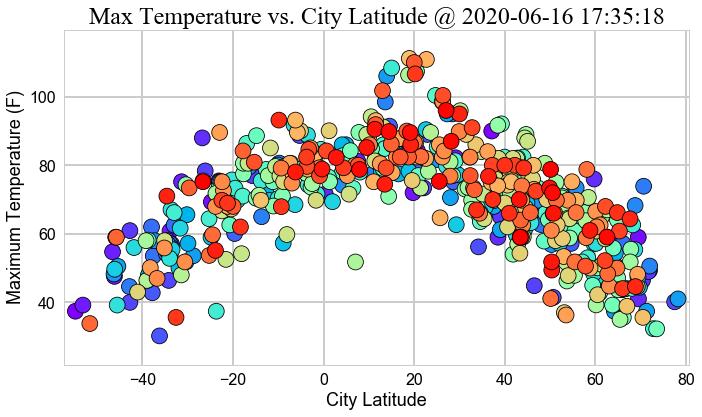

In [10]:
# Let's draw scatter plot of Max Temperature (F) vs. City Latitude
ScatterPlot (XValues = df_weather["Latitude"],\
             YValues = df_weather["Max_Temp"],\
             Title = "Max Temperature vs. City Latitude",\
             XLabel = "City Latitude",\
             YLabel = "Maximum Temperature (F)",\
             Output_File = "Output_Data/Latitude_MaxTemp.png")

### Conclusion: The maximum temperature is hottest near the Tropic of Cancer 
* **This is expected due to summer in the Northern Hemisphere and winter in Southern Hemisphere**
* **Maximum temperature is lowest near North and South poles**

## Humidity (%) vs. City Latitude Plot

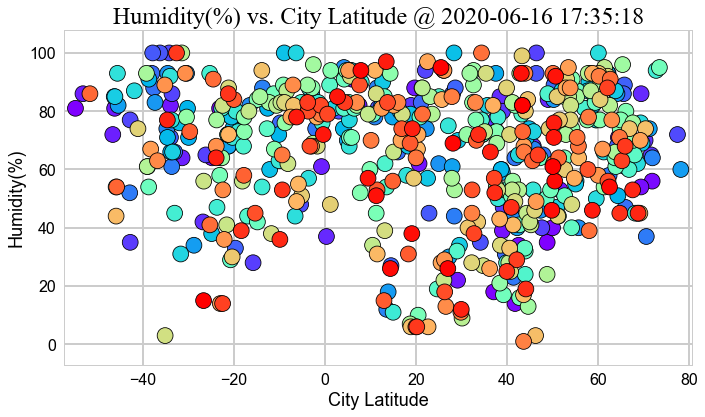

In [11]:
# Let's draw scatter plot of Humidity (%) vs. City Latitude
ScatterPlot (XValues = df_weather["Latitude"],\
             YValues = df_weather["Humidity"],\
             Title = "Humidity(%) vs. City Latitude",\
             XLabel = "City Latitude",\
             YLabel = "Humidity(%)",\
             Output_File = "Output_Data/Latitude_Humidity.png")

### Conclusion: Humidity % is unrelated to Latitude 
* **Southern Hemisphere (winter season) has lower average humidity than Northern Hemisphere**

## Cloudiness(%) vs. City Latitude Plot

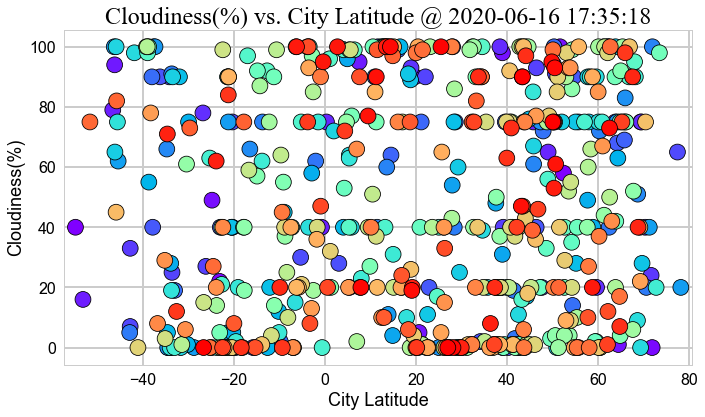

In [12]:
# Let's draw scatter plot of Cloudiness(%) vs. City Latitude
ScatterPlot (XValues = df_weather["Latitude"],\
             YValues = df_weather["Cloudiness"],\
             Title = "Cloudiness(%) vs. City Latitude",\
             XLabel = "City Latitude",\
             YLabel = "Cloudiness(%)",\
             Output_File = "Output_Data/Latitude_Cloudiness.png")

### Conclusion: Cloudiness is unrelated to Latitude 
* **More cloud cover in Northern Hemisphere (for latitude > 40) as compared to Southern Hemisphere**

## Wind Speed (mph) vs. City Latitude

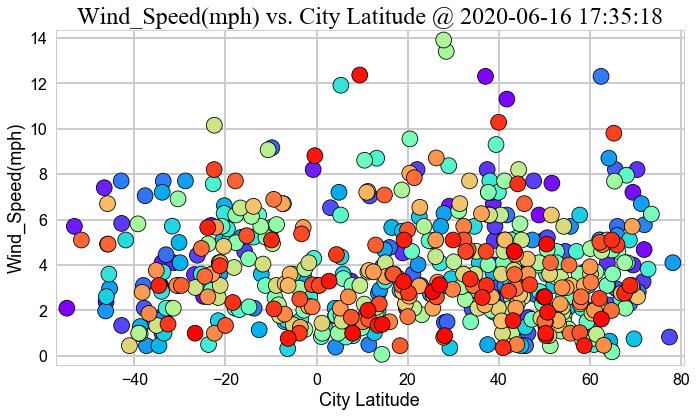

In [13]:
# Let's draw scatter plot of Wind Speed(mph) vs. City Latitude
ScatterPlot (XValues = df_weather["Latitude"],\
             YValues = df_weather["Wind_Speed"],\
             Title = "Wind_Speed(mph) vs. City Latitude",\
             XLabel = "City Latitude",\
             YLabel = "Wind_Speed(mph)",\
             Output_File = "Output_Data/Latitude_WindSpeed.png")

### Conclusion: Wind Speed is unrelated to Latitude  
* **Highest Wind Speed is observed near Tropic of Cancer (summer season), Northern Hemisphere is more turbulent**

# Linear Regression

## A function that can create Linear Regression Plots to make plotting much easier

In [14]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
def LinearRegPlot (XValues, YValues, Title, XLabel, YLabel, Title_offset, Output_File):
    # Set the style for seaborn plot
    sns.set_style("whitegrid")
    # Create a font library
    titlefont = {"fontname":"Times New Roman"}
    labelfont = {"fontname":"Arial"}
    # Set font scale and reduce grid line width
    sns.set_context("paper",font_scale=1.4, rc={"grid.linewidth":2})
    # Define the figure size
    fig = plt.figure(figsize=(10,6))
    # Make a color map
    t = np.arange(len(XValues))
    # Creating padding around the x and y limits
    y_pad = abs(0.2*YValues.mean()) # 20% of mean y value
    x_pad = abs(0.1*XValues.mean()) # 10% of mean x value
    # Linear Regression Model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(XValues, YValues)
    # Calculated y_model from the Model
    y_model = XValues * slope + intercept
    # Equation of the line from the Linear Regression Model
    Model_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot of the data set
    plt.scatter(x = XValues,\
                y = YValues,\
                edgecolor = "black",\
                s = 250,\
                c = t,\
                cmap = "Set2_r"\
               )
    # Plot the Linear regression model
    plt.plot(XValues,y_model,color="blue",linestyle ="dashdot",linewidth=2)
    # Annotate the equation and place it in the best location
    plt.annotate( Model_eqn,xy=(XValues.min()-0.5*x_pad,YValues.max()+0.5*y_pad), fontsize = 20,\
                 backgroundcolor = "white", va = "bottom", ha = "left",color = "blue",\
                 bbox=dict(facecolor='white', edgecolor='green', boxstyle='round'),**labelfont)
    # Sets the x limits of the current chart
    plt.xlim(XValues.min()-x_pad,XValues.max()+x_pad )
    # Sets the y limits of the current chart
    plt.ylim(YValues.min()-y_pad,YValues.max()+y_pad )
    # Format x ticks
    plt.xticks(fontsize=16,color="black")
    # Format y ticks
    plt.yticks(fontsize=16,color="black")
    # Display x & y-axis labels and a title for the lineplot
    plt.title(Title,fontsize=22,y = Title_offset, color = "black",**titlefont)
    plt.xlabel(XLabel,fontsize = 18,color="black",**labelfont)
    plt.ylabel(YLabel,fontsize = 18,color="black",**labelfont)
    print('\033[92m'+'\033[1m'+"Correlation Coefficient (R-squared):{}" \
          .format(round(rvalue,3))+'\033[0m')
    print('\033[94m'+'\033[1m'+"p-value (level of statistical significance):{}" \
          .format(round(pvalue,7))+'\033[0m')
    print('\033[96m'+'\033[1m'+"Standard error of estimate:{}" \
          .format(round(stderr,3))+'\033[0m')
    # Save the figure
    plt.savefig(Output_File)
    plt.show()

## Let's create Northern and Southern Hemisphere Dataframes

In [15]:
# Let's select Northern Hemisphere dataframe, i.e. of Latitude values > 0
df_North = df_weather.loc[(df_weather["Latitude"] > 0)]
# Let's reset index in the new dataframe
df_North.reset_index(drop = True, inplace=True)
print('\033[94m'+'\033[1m'+"The shape of the {} dataframe is:{}" \
      .format("Northern Hemisphere",df_North.shape)+'\033[0m')
df_North.head()

The shape of the Northern Hemisphere dataframe is:(408, 10)


,City,Country,Date,Latitude,Longitude,Humidity,Pressure,Max_Temp,Cloudiness,Wind_Speed
0,Hare Bay,CA,2020-06-16 17:35:18,48.85,-54.01,35,1021,71.60,75,6.2
1,Wolfsburg,DE,2020-06-16 17:35:07,52.43,10.80,73,1013,71.01,58,1.5
2,Klaksvík,FO,2020-06-16 17:35:19,62.23,-6.59,93,1017,51.80,100,5.1
3,Saint George,US,2020-06-16 17:34:00,37.10,-113.58,18,1011,90.00,1,12.3
4,Rawlins,US,2020-06-16 17:35:19,41.79,-107.24,14,1015,72.00,1,11.3


In [16]:
# Let's select Northern Hemisphere dataframe, i.e. of Latitude values > 0
df_South = df_weather.loc[(df_weather["Latitude"] < 0)]
# Let's reset index in the new dataframe
df_South.reset_index(drop = True, inplace=True)
print('\033[94m'+'\033[1m'+"The shape of the {} dataframe is:{}" \
      .format("Southern Hemisphere",df_South.shape)+'\033[0m')
df_South.head()

The shape of the Southern Hemisphere dataframe is:(175, 10)


,City,Country,Date,Latitude,Longitude,Humidity,Pressure,Max_Temp,Cloudiness,Wind_Speed
0,Ushuaia,AR,2020-06-16 17:35:18,-54.80,-68.30,81,1004,37.40,40,2.10
1,Rikitea,PF,2020-06-16 17:35:19,-23.12,-134.97,81,1020,75.45,22,5.74
2,Castro,BR,2020-06-16 17:35:20,-24.79,-50.01,64,1023,69.31,49,2.62
3,Port Elizabeth,ZA,2020-06-16 17:35:21,-33.92,25.57,82,1033,60.80,0,4.10
4,Mataura,NZ,2020-06-16 17:35:21,-46.19,168.86,81,1013,47.57,94,2.38


In [17]:
# Let's see if there are any city located exactly at the equator
# First we get the indexes where Latitude is null
IndexNull = df_weather[df_weather["Latitude"] == 0].index
# Let's check if there are any rows for the null index list
df_weather.iloc[IndexNull,:]

,City,Country,Date,Latitude,Longitude,Humidity,Pressure,Max_Temp,Cloudiness,Wind_Speed


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation Coefficient (R-squared):-0.748
p-value (level of statistical significance):0.0
Standard error of estimate:0.026


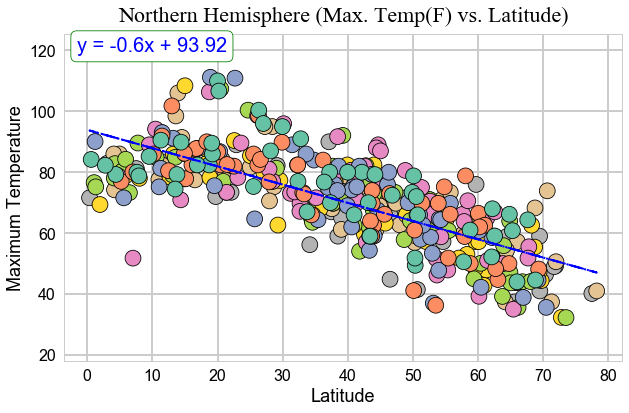

In [18]:
# Let's plot linear regression for Northern Hemisphere - Max. Temp vs. Latitude
LinearRegPlot (XValues = df_North["Latitude"],\
               YValues = df_North["Max_Temp"],\
               Title = "Northern Hemisphere (Max. Temp(F) vs. Latitude)",\
               XLabel = "Latitude",\
               YLabel = "Maximum Temperature",\
               Title_offset = 1.02,\
               Output_File = "Output_Data/North_MaxTemp.png")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation Coefficient (R-squared):0.782
p-value (level of statistical significance):0.0
Standard error of estimate:0.047


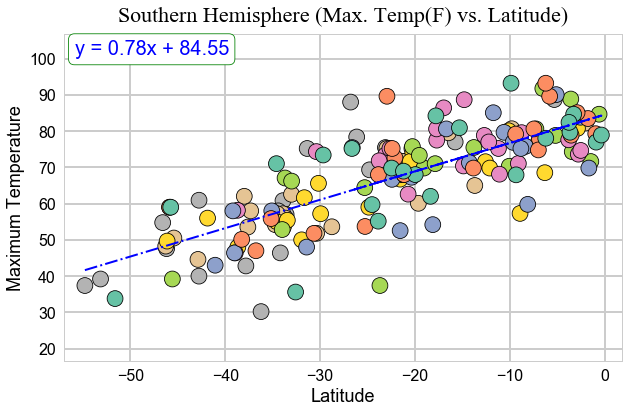

In [19]:
# Let's plot linear regression for Southern Hemisphere - Max. Temp vs. Latitude
LinearRegPlot (XValues = df_South["Latitude"],\
               YValues = df_South["Max_Temp"],\
               Title = "Southern Hemisphere (Max. Temp(F) vs. Latitude)",\
               XLabel = "Latitude",\
               YLabel = "Maximum Temperature",\
               Title_offset = 1.02,\
               Output_File = "Output_Data/South_MaxTemp.png")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation Coefficient (R-squared):0.04
p-value (level of statistical significance):0.4147946
Standard error of estimate:0.06


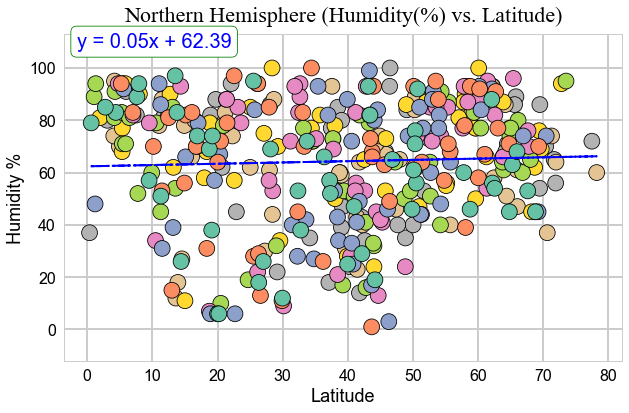

In [20]:
# Let's plot linear regression for Northern Hemisphere - Humidity vs. Latitude
LinearRegPlot (XValues = df_North["Latitude"],\
               YValues = df_North["Humidity"],\
               Title = "Northern Hemisphere (Humidity(%) vs. Latitude)",\
               XLabel = "Latitude",\
               YLabel = "Humidity %",\
               Title_offset = 1.02,\
               Output_File = "Output_Data/North_Humidity.png")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation Coefficient (R-squared):-0.003
p-value (level of statistical significance):0.9644541
Standard error of estimate:0.109


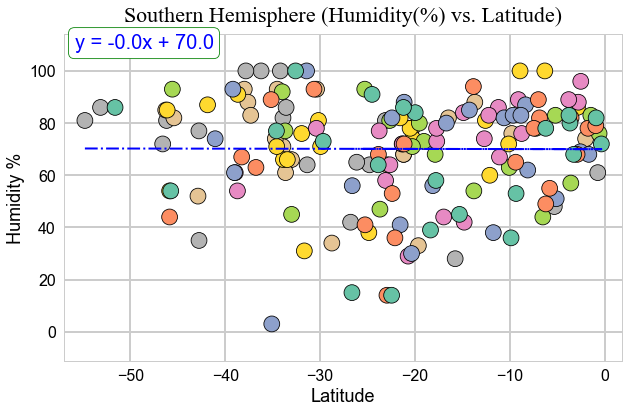

In [21]:
# Let's plot linear regression for Southern Hemisphere - Humidity vs. Latitude
LinearRegPlot (XValues = df_South["Latitude"],\
               YValues = df_South["Humidity"],\
               Title = "Southern Hemisphere (Humidity(%) vs. Latitude)",\
               XLabel = "Latitude",\
               YLabel = "Humidity %",\
               Title_offset = 1.02,\
               Output_File = "Output_Data/South_Humidity.png")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation Coefficient (R-squared):-0.018
p-value (level of statistical significance):0.7153384
Standard error of estimate:0.094


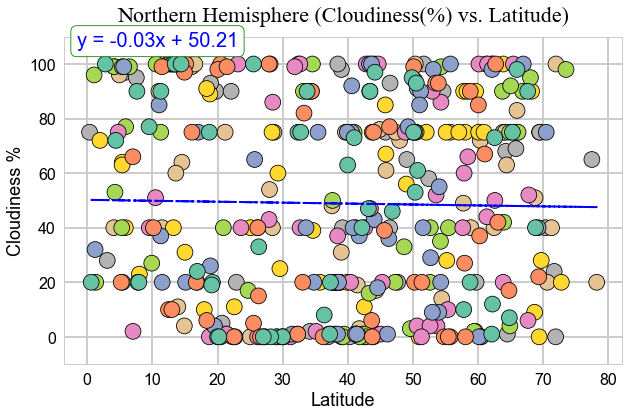

In [22]:
# Let's plot linear regression for Northern Hemisphere - Cloudiness vs. Latitude
LinearRegPlot (XValues = df_North["Latitude"],\
               YValues = df_North["Cloudiness"],\
               Title = "Northern Hemisphere (Cloudiness(%) vs. Latitude)",\
               XLabel = "Latitude",\
               YLabel = "Cloudiness %",\
               Title_offset = 1.03,\
               Output_File = "Output_Data/North_Cloudiness.png")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation Coefficient (R-squared):-0.049
p-value (level of statistical significance):0.516987
Standard error of estimate:0.204


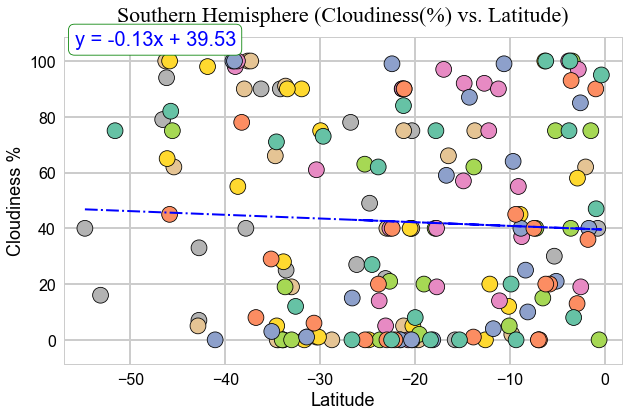

In [23]:
# Let's plot linear regression for Northern Hemisphere - Cloudiness vs. Latitude
LinearRegPlot (XValues = df_South["Latitude"],\
               YValues = df_South["Cloudiness"],\
               Title = "Southern Hemisphere (Cloudiness(%) vs. Latitude)",\
               XLabel = "Latitude",\
               YLabel = "Cloudiness %",\
               Title_offset = 1.03,\
               Output_File = "Output_Data/South_Cloudiness.png")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation Coefficient (R-squared):-0.01
p-value (level of statistical significance):0.8407991
Standard error of estimate:0.006


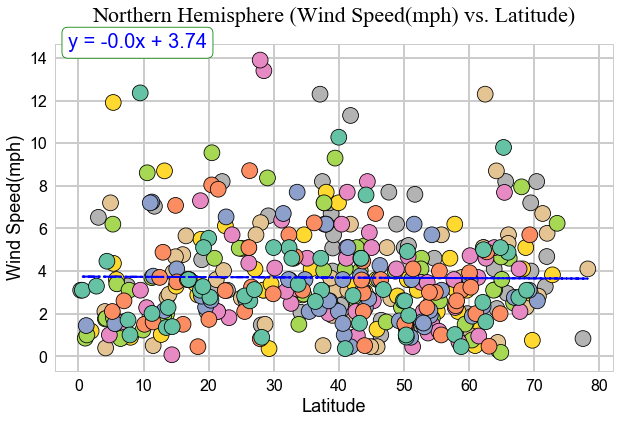

In [24]:
# Let's plot linear regression for Northern Hemisphere - Wind Speed(mph) vs. Latitude
LinearRegPlot (XValues = df_North["Latitude"],\
               YValues = df_North["Wind_Speed"],\
               Title = "Northern Hemisphere (Wind Speed(mph) vs. Latitude)",\
               XLabel = "Latitude",\
               YLabel = "Wind Speed(mph)",\
               Title_offset = 1.05,\
               Output_File = "Output_Data/North_WindSpeed.png")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation Coefficient (R-squared):0.045
p-value (level of statistical significance):0.5559869
Standard error of estimate:0.012


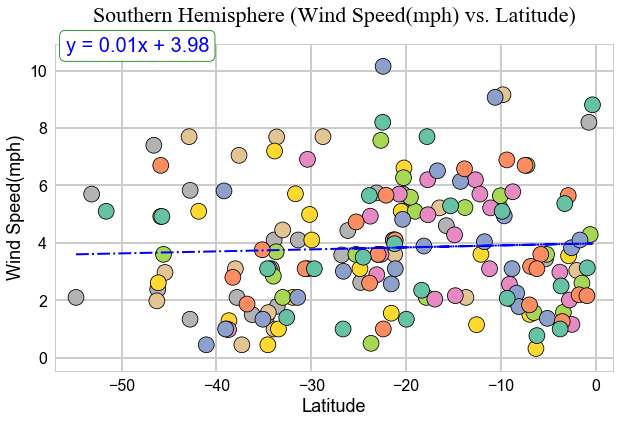

In [25]:
# Let's plot linear regression for Southern Hemisphere - Wind Speed(mph) vs. Latitude
LinearRegPlot (XValues = df_South["Latitude"],\
               YValues = df_South["Wind_Speed"],\
               Title = "Southern Hemisphere (Wind Speed(mph) vs. Latitude)",\
               XLabel = "Latitude",\
               YLabel = "Wind Speed(mph)",\
               Title_offset = 1.05,\
               Output_File = "Output_Data/South_WindSpeed.png")

### End of Analysis